In [1]:
#importing pandas because it's good
import pandas as pd

In [2]:
#reading the file
train = pd.read_csv("data/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

In [3]:
#exploratory data anaysis
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
#exploration again
print(train.shape)

(25000, 3)


In [5]:
#still exploring
print(train.columns.values)

['id' 'sentiment' 'review']


In [6]:
#viewing the structure of data we need to work on
print(train.review[0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [7]:
#using BeautifulSoup to clean data initially
from bs4 import BeautifulSoup
#the html tags and comments etc are reomved and stored as example1
example1 = BeautifulSoup(train.review[0],"html.parser")

In [8]:
#by using .get_text() method we can see the only texts in the html document
#it is also better as compared to the raw html doc
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [9]:
#removing numbers
import re
# a '^' within square brackets searches anything other than the one on it
# hence here it matches everything numbers and punctuations etc , leaving only the words
letters_only = re.sub("[^a-zA-Z]"," ",example1.get_text())
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [10]:
# changing all the words to lowercase to create a bag of words later
lower_case = letters_only.lower()
# the whole doc is now split to create an array from which most common words called "stop words" will be removed
words = lower_case.split()

In [11]:
#importing stopwords from nltk
from nltk.corpus import stopwords
#some stopwords in english language are
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [12]:
#removing most common words from doc
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [13]:
# the above code cleans only one review , let's make a function from above code that can clean all the reviews
def review_to_words(raw_review):
    #remove html using BeautifulSoup
    review_text = BeautifulSoup(raw_review,"html.parser").get_text()
    #removing raw letters,numbers,punctuations
    letters_only = re.sub("[^a-zA-Z]"," ",review_text)
    #creating an array , resolving whitespaces
    words = letters_only.lower().split()
    #create an array of stopwords so that we don't have to access corpus to search for a stopword
    stop = set(stopwords.words("english"))
    #removing stopwords from the raw_review
    meaningful_words = [w for w in words if w not in stop]
    #return a string with only the words that are important
    return(" ".join(meaningful_words))

In [14]:
#checking if our function works properly
check_review = review_to_words(train.review[0])
print(check_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [15]:
#finding the number of reviews
num_reviews = train.review.size
print("number of reviews :",num_reviews)

number of reviews : 25000


In [16]:
#storing all reviews at one place
clean_train_reviews = []
for i in range(num_reviews):
    clean_train_reviews.append(review_to_words(train.review[i]))
    if(i%5000==0):
        print("cleaning in process . . . . . . ")
        #included an extra line to visualize if our code is working properly or not
        print("cleaned ",i,"reviews till now")
print("cleaning complete")

cleaning in process . . . . . . 
cleaned  0 reviews till now
cleaning in process . . . . . . 
cleaned  5000 reviews till now
cleaning in process . . . . . . 
cleaned  10000 reviews till now
cleaning in process . . . . . . 
cleaned  15000 reviews till now
cleaning in process . . . . . . 
cleaned  20000 reviews till now
cleaning complete


In [17]:
print("Creating a bag of words . . . . . ")
#import CountVectorizer to create token counts of document
from sklearn.feature_extraction.text import CountVectorizer
#initializing the parameters as None so that we can write and manipulate the processing by our own
vectorizer = CountVectorizer(analyzer="word",
                            tokenizer=None,
                            preprocessor=None,
                            stop_words=None,
                            max_features=5000)
#train the classifer using fit_transform() method
train_data_features = vectorizer.fit_transform(clean_train_reviews)
#change the classifier into array
train_data_features = train_data_features.toarray()

Creating a bag of words . . . . . 


In [18]:
print(train_data_features.shape)

(25000, 5000)


In [19]:
#see all the features names
vocab = vectorizer.get_feature_names()
print(" , ".join(vocab[0:10])," . . . . "," , ".join(vocab[-10:]))

abandoned , abc , abilities , ability , able , abraham , absence , absent , absolute , absolutely  . . . .  yet , york , young , younger , youth , zero , zizek , zombie , zombies , zone


In [20]:
import numpy as np
#frequency of each word is found using np.sum()
dist = np.sum(train_data_features,axis=0)
ct = 0
for tag,count in zip(vocab,dist):
    print(tag,":",count,end=" ")

abandoned : 187 abc : 125 abilities : 108 ability : 454 able : 1259 abraham : 85 absence : 116 absent : 83 absolute : 352 absolutely : 1485 absurd : 306 abuse : 192 abusive : 91 abysmal : 98 academy : 297 accent : 485 accents : 203 accept : 300 acceptable : 130 accepted : 144 access : 92 accident : 318 accidentally : 200 accompanied : 88 accomplished : 124 according : 296 account : 186 accuracy : 81 accurate : 284 accused : 123 achieve : 179 achieved : 139 achievement : 124 acid : 90 across : 971 act : 1251 acted : 658 acting : 6490 action : 3354 actions : 311 activities : 83 actor : 2389 actors : 4486 actress : 1219 actresses : 369 acts : 394 actual : 793 actually : 4237 ad : 148 adam : 302 adams : 98 adaptation : 453 adaptations : 80 adapted : 154 add : 810 added : 439 adding : 166 addition : 347 adds : 337 adequate : 113 admire : 124 admit : 621 admittedly : 134 adorable : 101 adult : 510 adults : 376 advance : 100 advanced : 90 advantage : 153 adventure : 510 adventures : 204 adver

 : 421 christ : 183 christian : 373 christianity : 79 christians : 92 christmas : 623 christopher : 415 christy : 97 chuck : 142 church : 406 cia : 123 cinderella : 233 cinema : 1491 cinematic : 412 cinematographer : 101 cinematography : 983 circle : 103 circumstances : 218 cities : 88 citizen : 125 city : 1195 civil : 140 civilization : 93 claim : 222 claimed : 100 claims : 205 claire : 173 clark : 204 class : 893 classes : 106 classic : 1828 classical : 88 classics : 233 claus : 80 clean : 243 clear : 786 clearly : 899 clever : 533 cleverly : 94 clich : 840 cliche : 96 cliff : 112 climactic : 93 climax : 422 clint : 110 clip : 83 clips : 162 clock : 96 close : 1296 closed : 92 closely : 140 closer : 206 closest : 94 closet : 103 closing : 177 clothes : 328 clothing : 110 clown : 107 club : 434 clue : 224 clues : 123 clumsy : 105 co : 604 coach : 102 coast : 80 code : 241 coffee : 106 coherent : 109 cold : 571 cole : 132 collection : 343 college : 496 colonel : 106 color : 402 colorfu

: 111 fighting : 607 fights : 285 figure : 758 figured : 187 figures : 191 files : 80 fill : 231 filled : 551 film : 40147 filmed : 763 filming : 393 filmmaker : 334 filmmakers : 566 films : 6887 final : 1329 finale : 267 finally : 1536 financial : 105 find : 4131 finding : 358 finds : 948 fine : 1324 finest : 278 finger : 97 finish : 410 finished : 302 fire : 632 fired : 133 firm : 81 first : 9061 firstly : 90 fish : 157 fisher : 129 fishing : 78 fit : 489 fits : 215 fitting : 137 five : 933 fix : 100 flair : 78 flash : 149 flashback : 176 flashbacks : 240 flat : 577 flaw : 140 flawed : 156 flawless : 125 flaws : 362 flesh : 247 flick : 1258 flicks : 357 flies : 105 flight : 177 floating : 89 floor : 281 flop : 108 florida : 107 flow : 161 fly : 232 flying : 357 flynn : 147 focus : 509 focused : 203 focuses : 182 focusing : 106 folk : 116 folks : 346 follow : 785 followed : 373 following : 564 follows : 499 fond : 102 fonda : 111 food : 333 fool : 219 fooled : 95 foot : 259 footage : 

 283 known : 1080 knows : 901 kolchak : 78 kong : 270 korean : 131 kubrick : 130 kudos : 128 kumar : 80 kung : 243 kurosawa : 83 kurt : 149 kyle : 96 la : 552 lab : 131 lack : 1058 lacked : 121 lacking : 277 lackluster : 79 lacks : 365 ladies : 295 lady : 848 laid : 160 lake : 250 lame : 742 land : 362 landing : 81 landscape : 115 landscapes : 86 lane : 170 language : 529 large : 556 largely : 227 larger : 143 larry : 183 last : 2933 lasted : 99 late : 1211 lately : 96 later : 2200 latest : 201 latin : 94 latter : 362 laugh : 1374 laughable : 422 laughably : 82 laughed : 366 laughing : 528 laughs : 658 laughter : 244 laura : 166 laurel : 121 law : 510 lawrence : 111 laws : 96 lawyer : 210 lay : 93 lazy : 168 le : 143 lead : 1310 leader : 248 leading : 622 leads : 750 league : 176 learn : 720 learned : 254 learning : 175 learns : 226 least : 3112 leave : 1107 leaves : 683 leaving : 482 led : 330 lee : 814 left : 2125 leg : 112 legacy : 80 legal : 87 legend : 301 legendary : 192 legs : 1

 : 78 remaining : 120 remains : 439 remake : 583 remarkable : 309 remarkably : 105 remarks : 91 remember : 1702 remembered : 258 remind : 157 reminded : 347 reminds : 297 reminiscent : 175 remote : 163 remotely : 189 removed : 108 rendition : 90 rent : 719 rental : 214 rented : 337 renting : 177 repeat : 143 repeated : 204 repeatedly : 119 repetitive : 123 replaced : 162 report : 96 reporter : 213 represent : 103 represented : 99 represents : 132 reputation : 191 required : 190 requires : 132 rescue : 231 research : 222 resemblance : 107 resemble : 80 resembles : 113 resident : 85 resist : 84 resolution : 130 resort : 89 resources : 89 respect : 499 respected : 83 respectively : 79 response : 122 responsibility : 88 responsible : 275 rest : 1803 restaurant : 119 restored : 90 result : 632 resulting : 82 results : 274 retarded : 161 retired : 82 return : 624 returned : 117 returning : 126 returns : 307 reunion : 151 reveal : 189 revealed : 256 revealing : 122 reveals : 183 revelation : 

: 126 warm : 227 warming : 109 warmth : 86 warn : 153 warned : 174 warner : 177 warning : 314 warren : 117 warrior : 120 warriors : 82 wars : 332 washington : 272 waste : 1457 wasted : 560 wasting : 150 watch : 6973 watchable : 307 watched : 2236 watches : 122 watching : 4603 water : 547 waters : 108 watson : 85 wave : 173 waves : 93 way : 8026 wayne : 236 ways : 804 weak : 761 weakest : 99 wealth : 109 wealthy : 153 weapon : 148 weapons : 168 wear : 186 wearing : 326 wears : 166 web : 114 website : 112 wedding : 304 week : 460 weekend : 207 weeks : 202 weight : 139 weird : 663 welcome : 214 well : 10662 welles : 251 wells : 121 wendy : 98 went : 1463 werewolf : 272 wes : 121 west : 476 western : 600 westerns : 164 wet : 96 whale : 116 whatever : 732 whats : 85 whatsoever : 319 whenever : 270 whereas : 149 whether : 856 whilst : 280 white : 1492 whoever : 202 whole : 3078 wholly : 82 whoopi : 84 whose : 986 wicked : 118 wide : 281 widely : 87 widmark : 155 widow : 105 wife : 2140 wild 

In [21]:
startswith = []
for val in vocab:
    if(val[0] not in startswith):
        startswith.append(val[0])
print(startswith)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']


In [22]:
#counting the total numbers of words starting
counts = np.zeros((len(startswith)),dtype=np.int)
for val in vocab:
    index = startswith.index(val[0])
    counts[index] += 1
print(counts)

[316 270 470 301 226 250 151 191 158  71  63 199 276 111  89 336  16 286
 593 267  80  68 193  14   5]


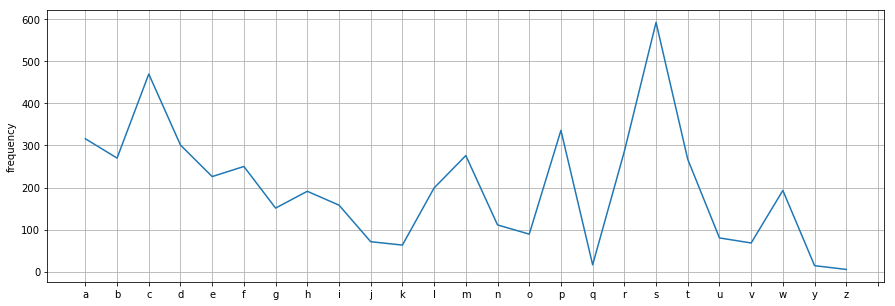

In [23]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,5))
plt.plot(counts)
nums = [i for i in range(26)]
plt.xticks(nums,startswith)
plt.grid()
plt.ylabel("frequency")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
print("fitting RandomForest . . . ")
forest = forest.fit(train_data_features,train["sentiment"])

fitting RandomForest . . . 


In [25]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
print("fitting NaiveBayes . . . ")
naive.fit(train_data_features,train["sentiment"])

fitting NaiveBayes . . . 


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators = 100)
print("fitting AdaBoost . . . ")
adaboost.fit(train_data_features,train["sentiment"])
print("fitting complete.")

fitting AdaBoost . . . 
fitting complete.


In [27]:
test = pd.read_csv("data/testData.tsv",header=0,delimiter="\t",quoting=3)
print("shape :",test.shape)
print(test.info())

shape : (25000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB
None


In [28]:
num_reviews = len(test["review"])
clean_test_reviews = []
print("Cleaning and parsing . . . . ")
for i in range(0,num_reviews):
    if((i+1)%3000 == 0):
        print(i+1," reviews processed . . .")
    clean_review = review_to_words(test["review"][i])
    clean_test_reviews.append(clean_review)
print("processing complete.")

Cleaning and parsing . . . . 
3000  reviews processed . . .
6000  reviews processed . . .
9000  reviews processed . . .
12000  reviews processed . . .
15000  reviews processed . . .
18000  reviews processed . . .
21000  reviews processed . . .
24000  reviews processed . . .
processing complete.


In [29]:
test_data_features = vectorizer.fit_transform(clean_test_reviews)
test_data_features = test_data_features.toarray()
print("predicting using RandomForest . . . ")
result1 = forest.predict(test_data_features)
print("predicting using Naive Bayes . . . ")
result2 = naive.predict(test_data_features)
print("predicting using AdaBoost . . . ")
result3 = adaboost.predict(test_data_features)

predicting using RandomForest . . . 
predicting using Naive Bayes . . . 
predicting using AdaBoost . . . 


In [30]:
result = result1+result2+result3
for i in range(25000):
    if(result[i]==1):
        result[i]=0
    elif(result[i]==2):
        result[i]=1
    elif(result[i]==3):
        result[i]=1
output = pd.DataFrame(data = {"id":test["id"],"sentiment":result})
output.to_csv("output/Bag_of_Words_model.csv", index=False, quoting=3)